In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.use("Agg")  # noqa: E402

In [2]:
##Read in the data sets needed. X_1 and X_2 are the training feature data for
##the GPs. Y_1 are the labels for the first GP regression (area estimates), Y_2 are the
##labels for the second GP regression (distance errors)
##########################
#Read in training data X_1, X_2
file_path = 'Ped_1_GP_Training_Data_Features_X_THETAINIT.txt'

X_1 = np.loadtxt(file_path)
X_2 = X_1
#########################
#Read in training labels Y_1 for the Area Growth Values Ag for the 100 tests
file_path = 'Ped_1_GP_Training_Data_Labels_Y1_THETAINIT.txt'

Y_1 = np.loadtxt(file_path)

##########################
#Read in training labels Y_2 for the Mean Distance Errors for the 100 tests
file_path = 'Ped_1_GP_Training_Data_Labels_Y2_THETAINIT.txt'

# Read the data from the file
Y_2 = np.loadtxt(file_path)

#############################
#Read in test data X_Test (just a copy of the training features data for now)
file_path = 'Ped_1_GP_Testing_Data_Features_X_THETAINIT.txt'

X_test = np.loadtxt(file_path)
#############################
#Read in test data results Y_Test_1 for the area growth Ag
file_path = 'Ped_1_GP_Testing_Data_Labels_Y1_THETAINIT.txt'

Y_test_1 = np.loadtxt(file_path)
#############################
#Read in test data results Y_test_2 for the mean error
file_path = 'Ped_1_GP_Testing_Data_Labels_Y2_THETAINIT.txt'

Y_test_2 = np.loadtxt(file_path)

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1.0, (1e-3, 1e10)) * RBF([1.0, 1.0, 1.0, 1.0, 1.0], length_scale_bounds=(1e-2, 1e2))

# Create a Gaussian Process Regressor object
gp_1 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the Gaussian Process Regressor
gp_1.fit(X_1, Y_1)


GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10)

[4246.46 4165.53 4165.53 4352.8  4165.53 4437.44 4165.53 4165.53 4165.53
 4165.53 5244.57 4165.53 4165.53 5632.88 4672.32 4165.53 4753.11 4169.54
 5373.39 5264.8  4420.38 4396.  ]


/home/jlaudo/.local/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:477: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


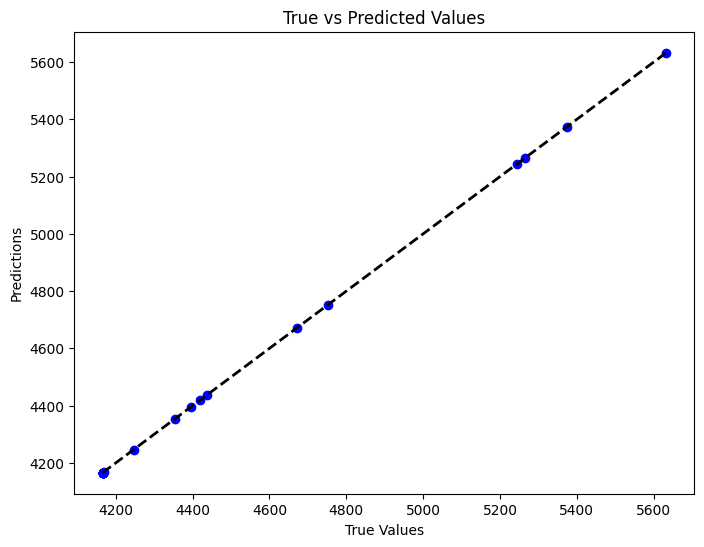

In [4]:
x_pred = X_test
#np.random.rand(100, 5)  # Generate new input data for prediction
y_pred, sigma = gp_1.predict(x_pred, return_std=True)
print(y_pred)
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_1, y_pred, color='blue')
plt.plot([Y_test_1.min(), Y_test_1.max()], [Y_test_1.min(), Y_test_1.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

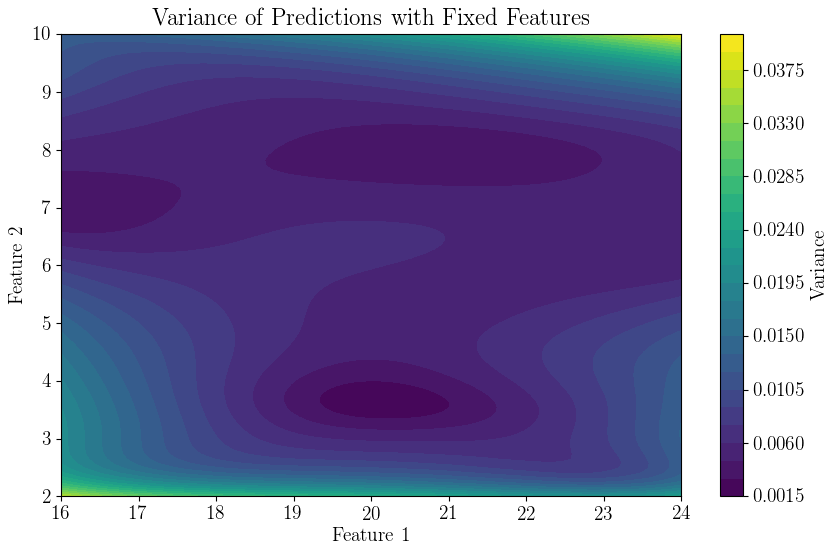

In [34]:

# Fixed values for the other three features
fixed_feature_1 = 0.5  # Example fixed value for feature 3
fixed_feature_2 = 1.3  # Example fixed value for feature 4
fixed_feature_3 = 1.5  # Example fixed value for feature 5

# Define the grid size for the two varying features
grid_size = 100

# Create ranges for the two variable features
feature_1_min, feature_1_max = 16, 24  # Example range for feature 1
feature_2_min, feature_2_max = 2, 10  # Example range for feature 2

# Create meshgrid for the two features you want to visualize
feature_1_grid = np.linspace(feature_1_min, feature_1_max, grid_size)
feature_2_grid = np.linspace(feature_2_min, feature_2_max, grid_size)
X1, X2 = np.meshgrid(feature_1_grid, feature_2_grid)

# Flatten the grid for prediction and add fixed features
grid_points = np.column_stack([
    X1.ravel(),   # Varying feature 1
    X2.ravel(),   # Varying feature 2
    np.full(X1.size, fixed_feature_1),  # Fixed feature 3
    np.full(X1.size, fixed_feature_2),  # Fixed feature 4
    np.full(X1.size, fixed_feature_3)   # Fixed feature 5
])

# Make predictions using the Gaussian Process
y_pred, var_area = gp_2.predict(grid_points, return_std=True)
var_area = var_area #** 2  # Convert standard deviation to variance

# Reshape var_area to fit the grid for plotting
var_area_reshaped = var_area.reshape((grid_size, grid_size))

# Plot variance of predictions
plt.figure(figsize=(10, 6))
plt.contourf(feature_1_grid, feature_2_grid, var_area_reshaped, levels=25, cmap='viridis')
plt.colorbar(label='Variance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Variance of Predictions with Fixed Features')
plt.show()

In [35]:
grid_size = 100
#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Theta crit range
feature_5_range = np.linspace(X_1[:, 4].min(), X_1[:, 4].max(), grid_size) #k range

#feature_4_range = np.linspace(1.2, 1.4, 500)
#feature_5_range = np.linspace(1.0, 2, 500)
#Define Grid Values for Feature 1
feature_1_grid, feature_2_grid = np.meshgrid(feature_2_range, feature_1_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [f1, f2, 0.7, 1.45, 1.2]
    for f1 in feature_1_range for f2 in feature_2_range 
])

# Predict using the GP model
err_predictions, var_err = gp_2.predict(grid, return_std = True)
area_predictions, var_area = gp_1.predict(grid, return_std = True)
print(var_area)
# Reshape results for contour plotting
area_predictions = area_predictions.reshape(-1)
var_area = np.diag(var_area).reshape(-1)

# Plotting the PDP with variance
plt.figure(figsize=(10, 6))

print(var_area.shape)
# Plot mean predictions
plt.contourf(feature_2_grid, feature_1_grid, var_area.reshape(grid_size, grid_size), levels=25, cmap='viridis')



plt.xlabel('Feature Value')
plt.ylabel('Prediction')
plt.title('Partial Dependence Plot with Variance Visualization')
plt.colorbar(label='GP 1 Uncertainty')
plt.legend()
plt.grid()
plt.show()

[255.25177756 252.60455582 249.97714517 ... 112.08751591 113.88175593
 115.7073561 ]
(100000000,)


ValueError: cannot reshape array of size 100000000 into shape (100,100)

<Figure size 1000x600 with 0 Axes>

In [ ]:
grid_size = 100
#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Theta crit range
feature_5_range = np.linspace(X_1[:, 4].min(), X_1[:, 4].max(), grid_size) #k range

#feature_4_range = np.linspace(1.2, 1.4, 500)
#feature_5_range = np.linspace(1.0, 2, 500)
#Define Grid Values for Feature 1
feature_1_grid, feature_2_grid = np.meshgrid(feature_2_range, feature_1_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [f1, f2, 0.7, f4, 1.2]
    for f1 in feature_1_range for f2 in feature_2_range for f4 in feature_4_range
])


# Predictive variance calculation
y_pred, sigma = gp_1.predict(grid, return_std=True)

# Find the region with the largest uncertainty
max_variance_idx = np.argmax(sigma)
max_variance_point = grid[max_variance_idx]
max_variance_value = sigma[max_variance_idx]

# Print the point with maximum uncertainty
print(f"Point with maximum uncertainty: {max_variance_point}")
print(f"Maximum predictive variance: {max_variance_value}")


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(Y_test_1, y_pred)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm^2")

r_squared = r2_score(Y_test_1, y_pred)

print("R-squared (R²):", r_squared)

ValueError: Found input variables with inconsistent numbers of samples: [22, 10000]

In [5]:
# Create a Gaussian Process Regressor object
gp_2 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Train the Gaussian Process Regressor
gp_2.fit(X_2, Y_2) #Train the GP on just tol, h, mu data

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10)

[1.87602997 1.99531001 1.84866    1.78474997 1.85299    2.01679001
 1.74199    1.97850998 2.06207999 1.97825    1.76433992 1.80004001
 1.95684998 1.79022999 1.88748949 1.87200999 1.99273999 1.82267007
 1.95439999 1.80398004 1.9517     1.98012004]


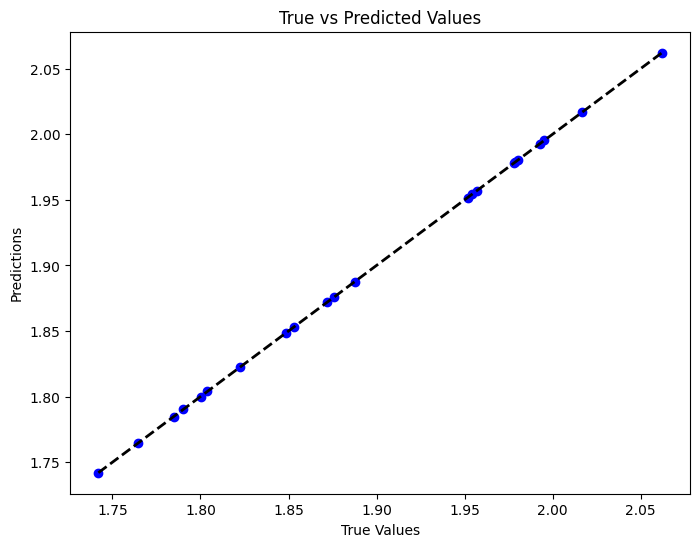

In [6]:
x_pred = X_test
#np.random.rand(100, 5)  # Generate new input data for prediction
y_pred_2, sigma = gp_2.predict(x_pred, return_std=True)
print(y_pred_2)
# Plot the results (since the output dimensionality is 1, it's difficult to visualize)
# Instead, you can plot the predicted values against the true values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test_2, y_pred_2, color='blue')
plt.plot([Y_test_2.min(), Y_test_2.max()], [Y_test_2.min(), Y_test_2.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [7]:
mse = mean_squared_error(Y_test_2, y_pred_2)

# Compute the root mean squared error
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse} mm")

r_squared = r2_score(Y_test_2, y_pred_2)

print("R-squared (R²):", r_squared)

NameError: name 'mean_squared_error' is not defined

In [13]:
arr, cov = gp_2.predict(np.array([24.080, 9.416, 0.2067, 1.3071, 1.1546]).reshape(1,-1), return_cov = True)
print(arr)

[1.93373015]


In [179]:
######## MINIMIZE GP2 Predictions
import numpy as np
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor

# Assuming you have a trained GaussianProcessRegressor model named 'gpr'
#tol_prior = uniform(loc=12, scale=25 - 12)
#h_prior = uniform(loc=2, scale=12 - 2)
#mu_prior = uniform(loc=0.0, scale = 1.0 - 0.0)
#Theta_crit_prior = uniform(loc=0.9, scale=2.2-0.9)
#kk_prior = kk_prior
# Define the bounds for the input variables, e.g., for a 2-dimensional input
# Assume X_1 and gp_2 are defined elsewhere
bounds = [(16, 24.0), 
          (3.5, 9.5), 
          (0.2, 0.9), 
          (1.2, 1.391),
          (0.64333136, 1.50)]  # Adding the fifth dimension

print(bounds)

# Define the objective function: the negative of the predicted mean
def objective_function(x):
    # Reshape x to be 2D array as expected by the predict method
    x = np.array(x).reshape(1, -1)
    # Predict the mean and standard deviation
    mean, std = gp_2.predict(x, return_std=True)
    # We want to minimize the mean, so return the negative mean
    return mean[0]

# Generate 100 random samples within the bounds
random_samples = np.array([np.random.uniform(low=b[0], high=b[1], size=1000) for b in bounds]).T

# Evaluate the objective function for each sample
objective_values = np.array([objective_function(sample) for sample in random_samples])

# Find the index of the minimum objective value
min_index = np.argmin(objective_values)

# Get the sample with the minimum objective value
best_sample = random_samples[min_index]

# Get the minimum prediction value
min_prediction_value = gp_2.predict(best_sample.reshape(1, -1))

print("Minimum prediction value:", min_prediction_value[0])
print("Input at minimum prediction value:", best_sample)

[(16, 24.0), (3.5, 9.5), (0.2, 0.9), (1.2, 1.391), (0.64333136, 1.5)]
Minimum prediction value: 1.7119116145405684
Input at minimum prediction value: [16.26733152  6.96972582  0.31357216  1.20644024  1.39258421]


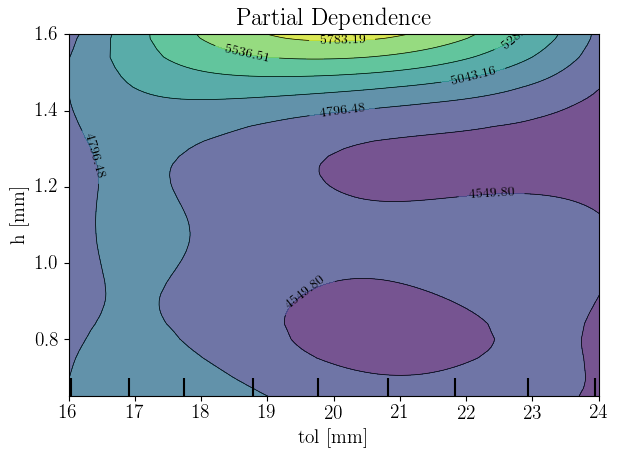

In [154]:
import sklearn.inspection
from sklearn.inspection import PartialDependenceDisplay

#####Tol Partial Dependencies Contour Plots
#Figure 1 tol and h partial dependence

PartialDependenceDisplay.from_estimator(gp_1, X_2, [(0, 4)])
plt.rc('font', size=14)
plt.xlabel('tol [mm]')
plt.xlim([16, 24])
plt.ylim([0.65, 1.6])
plt.ylabel('h [mm]')
plt.title('Partial Dependence')
plt.tight_layout()
plt.show()

In [42]:
gp_1.predict(np.array([16.0208, 8.2488, 0.20859, 1.38848, 0.97364]).reshape(1,-1))

array([4975.73575243])

In [36]:
#FUNCTION TO MAP GP OUTPUT INTO A LIKELIHOOD VALUE
def transform_gp_output(area_output, error_output):
    L_list = []
    for i, j in zip(area_output, error_output):
        sigma_1 = 500 #Area measurement uncertainty for area gp
        sigma_2 = 0.125 #Std. Dev of the data
        err_min = 1.6035263642685322 #min value of error GP on the input space
        y = 4018.853198 #True Growth measured
        
        err_pred = j
        y_pred = i
        
        L = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y - y_pred)**2)/(sigma_1**2))) * (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((err_pred-err_min)**2)/(sigma_2**2))),   # Likelihood function with just Error Prediction        L_list.append(L)
        L_list.append(L)
        L_array = np.array(L_list)
    return L_array

1.7223113829686554
[4544.92736598 4536.75466364 4528.66610647 ... 4138.28826651 4138.34384134
 4138.38367002]


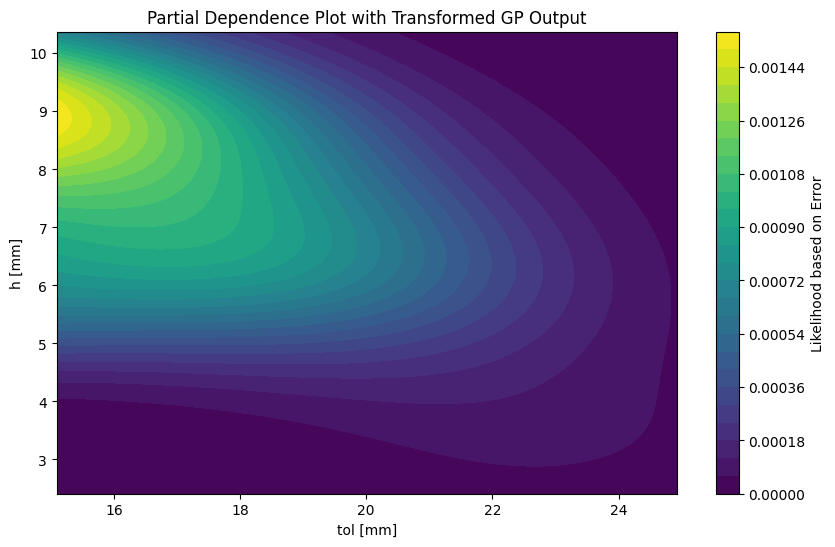

In [37]:
####TOL and H
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Theta crit range
feature_5_range = np.linspace(X_1[:, 4].min(), X_1[:, 4].max(), grid_size) #k range

#feature_4_range = np.linspace(1.2, 1.4, 500)
#feature_5_range = np.linspace(1.0, 2, 500)
#Define Grid Values for Feature 1
feature_1_grid, feature_2_grid = np.meshgrid(feature_2_range, feature_1_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [f1, f2, fixed_features[2], fixed_features[3], fixed_features[4]]
    for f1 in feature_1_range for f2 in feature_2_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(area_predictions)

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_2_grid, feature_1_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood based on Error')
plt.xlabel('tol [mm]')
plt.ylabel('h [mm]')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

1.6947582765737934
4143.131334445206


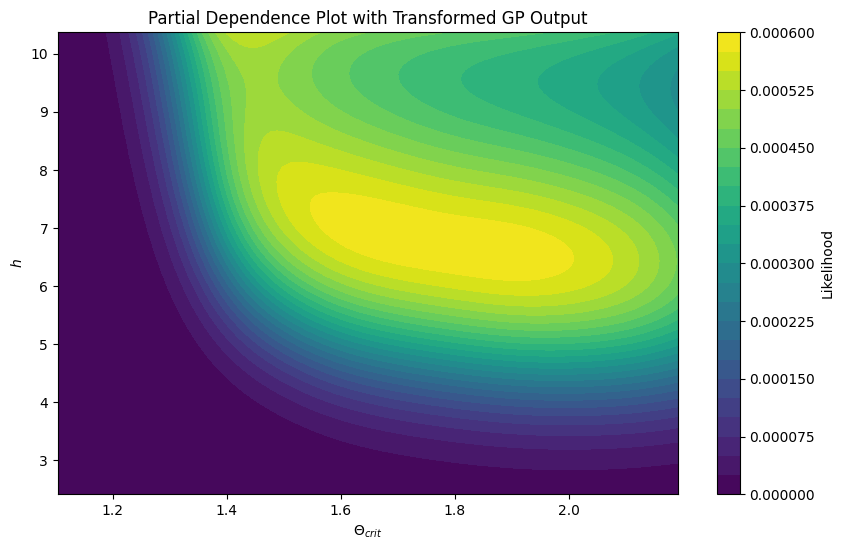

In [15]:
##h and Theta_crit
##### Generate grid points for partial dependence
grid_size = 100

#Define Feature Ranges
feature_1_range = np.linspace(X_1[:, 0].min(), X_1[:, 0].max(), grid_size) #tol range
feature_2_range = np.linspace(X_1[:, 1].min(), X_1[:, 1].max(), grid_size) #h range
feature_3_range = np.linspace(X_1[:, 2].min(), X_1[:, 2].max(), grid_size) #mu range
feature_4_range = np.linspace(X_1[:, 3].min(), X_1[:, 3].max(), grid_size) #Theta crit range
feature_5_range = np.linspace(X_1[:, 4].min(), X_1[:, 4].max(), grid_size) #k range

#Define Grid Values for Feature 1
feature_2_grid, feature_4_grid = np.meshgrid(feature_4_range, feature_2_range)
# Fix the other features at their mean values
fixed_features = X_1.mean(axis=0)

# Create the grid for prediction
grid = np.array([
    [fixed_features[0], f2, fixed_features[2], f4, fixed_features[4]]
    for f2 in feature_2_range for f4 in feature_4_range
])

# Predict using the GP model
err_predictions = gp_2.predict(grid)
area_predictions = gp_1.predict(grid)

print(min(err_predictions))
print(min(area_predictions))

# Apply the transformation to the predictions
transformed_predictions = transform_gp_output(area_predictions, err_predictions)

# Reshape the transformed predictions to match the grid
transformed_predictions_grid = transformed_predictions.reshape(grid_size, grid_size)

# Plot the partial dependence plot
plt.figure(figsize=(10, 6))
plt.contourf(feature_2_grid, feature_4_grid, transformed_predictions_grid, levels=25, cmap='viridis')
plt.colorbar(label='Likelihood')
plt.xlabel('$\Theta_{{crit}}$')
plt.ylabel('$h$')
plt.title('Partial Dependence Plot with Transformed GP Output')
plt.show()

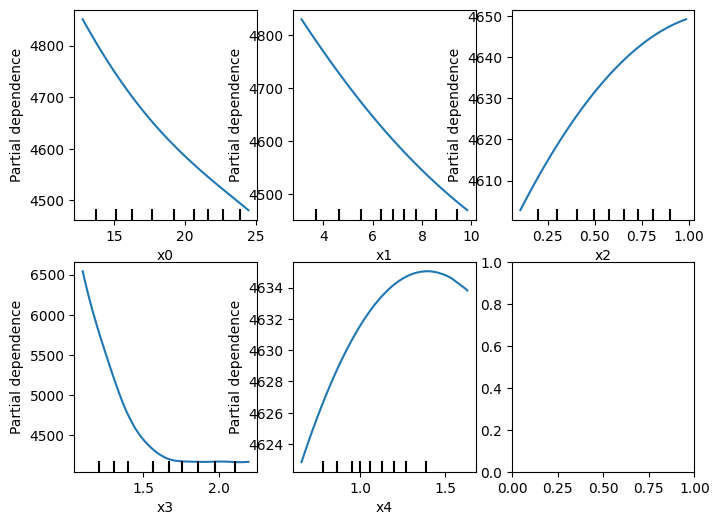

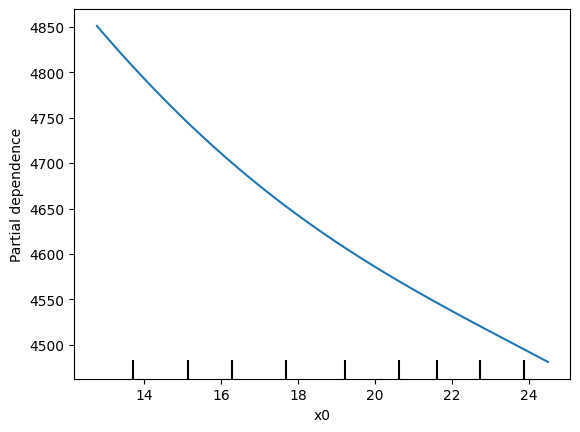

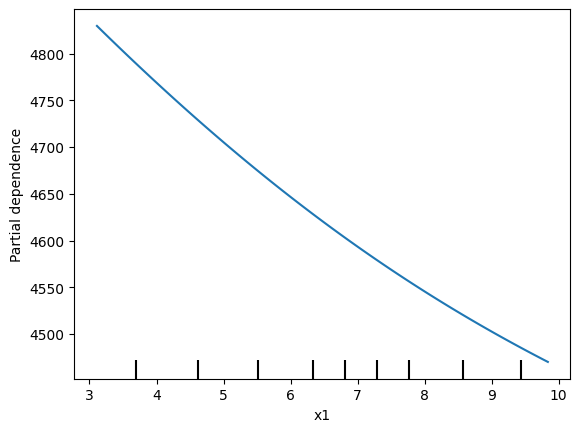

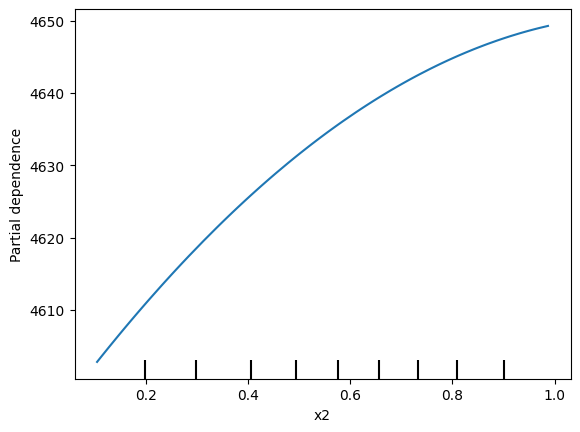

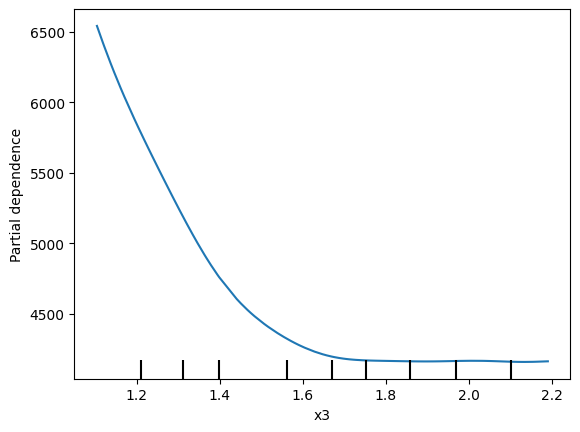

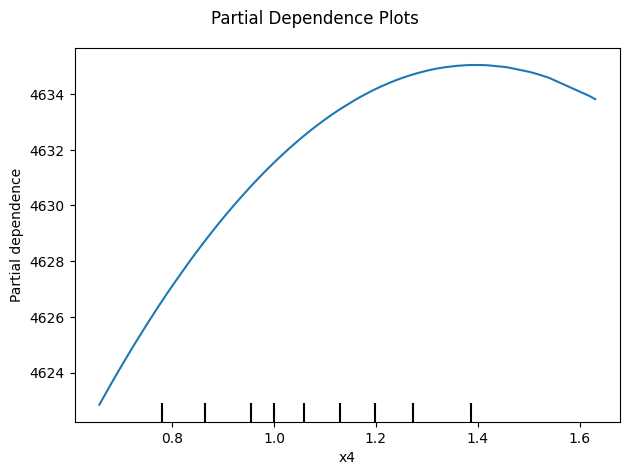

In [16]:
import sklearn.inspection
from sklearn.inspection import PartialDependenceDisplay



# Create a figure and axis objects for subplots
fig, axs = plt.subplots(2, 3, figsize=(8, 6))

x_ranges = [(10, 30), (0, 12), (0.0, 2.0), (0, 3), (0, 2)]

# Plot partial dependence for each feature
for i, ax in enumerate(axs.flat):
    if i <5:
      display = PartialDependenceDisplay.from_estimator(gp_1, X_1, features=[i])
      display.plot(ax=ax)

      # Set custom x-axis range for each subplot
      ax.set_xlim(x_ranges[i])

plt.suptitle('Partial Dependence Plots')
plt.tight_layout()
plt.show()

In [8]:
pip install emcee

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.mixture import GaussianMixture
class CustomGMM:
    def __init__(self, n_components=1, **kwargs):
        self.gmm = GaussianMixture(n_components=n_components, **kwargs)

    def fit(self, X):
        self.gmm.fit(X)

    def pdf(self, X):

        return np.exp(self.gmm.score_samples(np.array(X).reshape(-1, 1)))

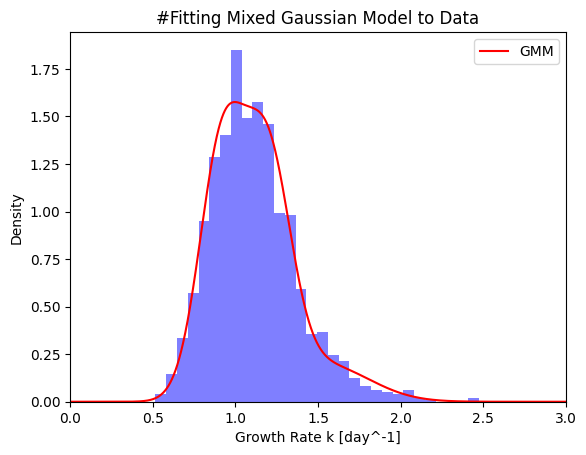

In [10]:
## Fit a Gaussian Mixture to Tina's Distribution
from sklearn.mixture import GaussianMixture
from IPython.display import display
%matplotlib inline

with open("Tina_kk_distribution_day_inverse.txt", 'r') as file:
   lines = file.readlines()

data = []
for line in lines:
    # Assuming each line contains one data point
    data_point = float(line.strip())  # Convert string to float
    data.append(data_point)

# Convert the list to a NumPy array if needed
import numpy as np
data_array = np.array(data)

gmm_data = data_array.reshape(-1,1)

# Fit a Gaussian Mixture Model
gmm = CustomGMM(n_components=3, random_state=42)
gmm.fit(gmm_data)


#Fit a second GMM without using the custom class fix to sample from it directly
gmm_2 = GaussianMixture(n_components=3, random_state=42)
gmm_2.fit(gmm_data)

# Generate data points for plotting
x = np.linspace(0, 300, 1000000)
# Compute the log-density of the Gaussian mixture model at each point
density = gmm.pdf(x)

# Plot the data and the fitted Gaussian mixture model
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

plt.plot(x, density, color='red', label='GMM')
plt.xlim([0,3])
plt.xlabel('Growth Rate k [day^-1]')
plt.ylabel('Density')
plt.title('#Fitting Mixed Gaussian Model to Data')
plt.legend()
plt.show()
plt.show()

kk_prior = gmm

In [11]:
gmm.pdf(2)

array([0.04522582])

In [12]:
starting_k_samples, __ = gmm_2.sample(100)
starting_k_samples = starting_k_samples.flatten().tolist()
print(starting_k_samples)

[1.0414512090547774, 1.240198310142626, 1.2346613134843216, 1.3362688992600507, 1.1152116300459491, 1.1229499620380325, 1.116530973775706, 1.0675377527451695, 0.8329963016007658, 1.3279141942156607, 1.3093109963352076, 0.9842216874372204, 1.13644122645437, 1.092774001748936, 1.0982001696802368, 0.8986898314411779, 1.1084611422532795, 1.2789283987215678, 1.5514335978929537, 1.250662365705407, 1.2128774662396409, 1.1243021126158321, 1.1125201881714495, 1.3275072130495946, 1.2363271966558655, 1.1076159177531328, 1.0539984797912147, 1.1734311306166048, 1.1217721616109877, 1.1951323827645612, 1.1640277445215923, 1.2499839239687025, 1.0201650873675947, 1.3475867031357451, 1.581830141379779, 1.361706348000188, 1.2262708571701837, 1.318383905108198, 1.0557302251813332, 0.9759680221916192, 1.7487413927870357, 1.39411566826089, 1.1755468145739316, 1.3015424530400526, 1.2339713513944666, 1.575929333544035, 1.69695287787266, 1.779571605094898, 1.781351400003129, 1.7436855784241763, 1.4835872020022

(0.0, 3.0)

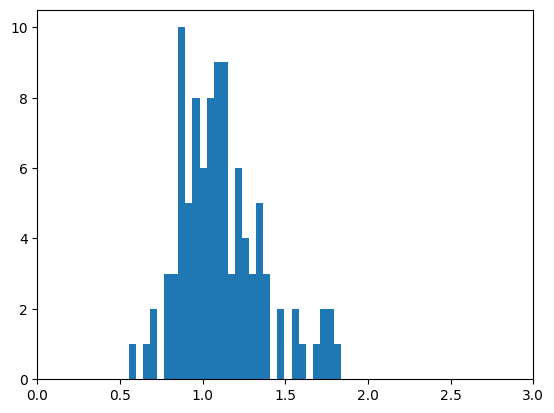

In [13]:
#Encodes the starting sample information for the walkers that sample on the k prior
plt.figure()
plt.hist(starting_k_samples, bins=30)
plt.xlim([0,3])

In [14]:
print(np.random.uniform(1.1, 1.3, 100))

[1.24997995 1.20860182 1.19990861 1.11412335 1.10822784 1.24992045
 1.26405946 1.22224719 1.2410201  1.23907056 1.1140707  1.24358204
 1.19023496 1.24946582 1.14255577 1.26719642 1.23461334 1.10360207
 1.20892496 1.21716101 1.21358858 1.1432038  1.10735906 1.2840391
 1.17492987 1.13047671 1.23839105 1.10838894 1.19735017 1.21018359
 1.18931606 1.1049677  1.26676809 1.15869076 1.18004485 1.16871597
 1.14751078 1.25822361 1.13662382 1.1940589  1.24215005 1.2313775
 1.15520152 1.17612673 1.17466311 1.22422194 1.25681979 1.19606317
 1.16532937 1.14019564 1.19072648 1.26936679 1.10498349 1.28120021
 1.19101145 1.10411616 1.23796071 1.27183514 1.16672889 1.23360781
 1.25719501 1.24367583 1.10765905 1.26026465 1.27839457 1.14787697
 1.23045361 1.24608331 1.17519369 1.24815186 1.27520749 1.12956903
 1.28837584 1.29319866 1.16022405 1.11631105 1.1554724  1.26038557
 1.28912548 1.22129335 1.23366424 1.14598717 1.1113244  1.16508365
 1.24496404 1.20337859 1.16884498 1.22148773 1.25217642 1.162207

In [15]:
hyperparameters = gp_1.kernel_.get_params()

# Print the length scale
print(hyperparameters)

hyperparameters_2 = gp_2.kernel_.get_params()

print(hyperparameters_2)

{'k1': 3.03e+03**2, 'k2': RBF(length_scale=[6.91, 25.1, 0.406, 0.34, 2.9]), 'k1__constant_value': np.float64(9210650.933509013), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([ 6.90512002, 25.09746267,  0.40555576,  0.34024989,  2.89616439]), 'k2__length_scale_bounds': (0.01, 100.0)}
{'k1': 0.943**2, 'k2': RBF(length_scale=[13.8, 2.54, 15, 0.643, 5.58]), 'k1__constant_value': np.float64(0.8896005110302577), 'k1__constant_value_bounds': (0.001, 10000000000.0), 'k2__length_scale': array([13.76596673,  2.53622162, 15.01728108,  0.64335667,  5.57776053]), 'k2__length_scale_bounds': (0.01, 100.0)}


In [16]:
gp_1._get_param_names()

['alpha',
 'copy_X_train',
 'kernel',
 'n_restarts_optimizer',
 'n_targets',
 'normalize_y',
 'optimizer',
 'random_state']

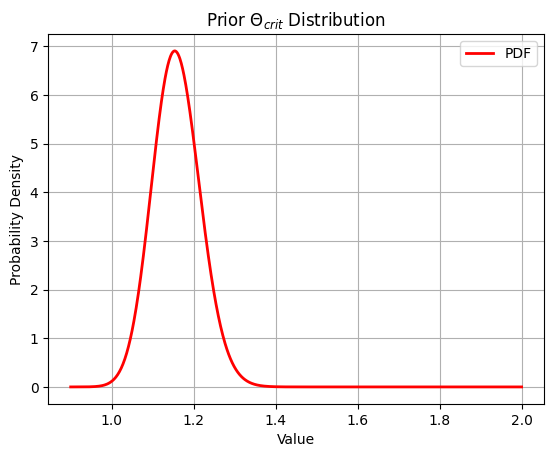

In [17]:
from scipy.stats import lognorm

# Define parameters for the log-normal distribution
mean = 1.1567  # Mean of the distribution
sigma = 0.05  # Standard deviation of the logarithm of the distribution

# Create a log-normal distribution object
Theta_crit_prior = lognorm(s=sigma, scale=mean)
x = np.linspace(0.9, 2, 1000)
pdf = Theta_crit_prior.pdf(x)
plt.plot(x, pdf, 'r-', lw=2, label='PDF')

plt.title('Prior $\Theta_{{crit}}$ Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#code to fix how the gmm pdf evaluates probability densities
def extract_first_item(obj):
    if isinstance(obj, np.ndarray) and obj.size > 0:
        return obj[0]
    else:
        return obj

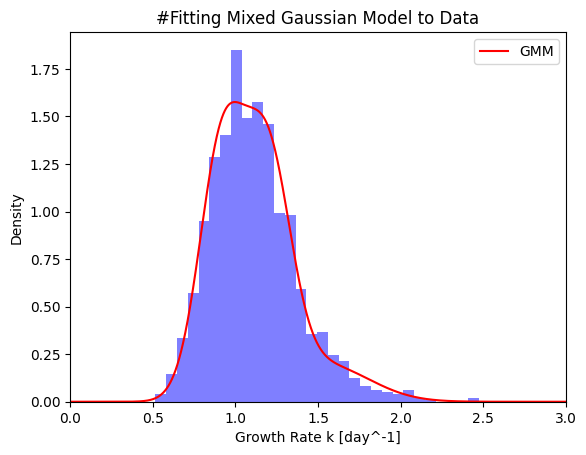

In [19]:
## Fit a Gaussian Mixture to Tina's Distribution
from sklearn.mixture import GaussianMixture
from IPython.display import display
%matplotlib inline

with open("Tina_kk_distribution_day_inverse.txt", 'r') as file:
   lines = file.readlines()

data = []
for line in lines:
    # Assuming each line contains one data point
    data_point = float(line.strip())  # Convert string to float
    data.append(data_point)

# Convert the list to a NumPy array if needed
import numpy as np
data_array = np.array(data)

gmm_data = data_array.reshape(-1,1)

# Fit a Gaussian Mixture Model
gmm = CustomGMM(n_components=3, random_state=42)
gmm.fit(gmm_data)


#Fit a second GMM without using the custom class fix to sample from it directly
gmm_2 = GaussianMixture(n_components=3, random_state=42)
gmm_2.fit(gmm_data)

# Generate data points for plotting
x = np.linspace(0, 300, 1000000)
# Compute the log-density of the Gaussian mixture model at each point
density = gmm.pdf(x)

# Plot the data and the fitted Gaussian mixture model
plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')

plt.plot(x, density, color='red', label='GMM')
plt.xlim([0,3])
plt.xlabel('Growth Rate k [day^-1]')
plt.ylabel('Density')
plt.title('#Fitting Mixed Gaussian Model to Data')
plt.legend()
plt.show()
plt.show()

kk_prior = gmm

In [20]:
##DEFINE AND RUN MCMC
import warnings
import numpy as np
import emcee
import corner

# Filter out runtime warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Function to compute likelihood
def likelihood(X, y, f, theta_init_hat):
    sigma_1 = 127.55 #Area measurement uncertainty for area gp (2.5 cm^2)
    sigma_2 = 0.125/4 #Std. Dev of the data
    err_min = 1.7119116145405684 #Approximate min value of error GP on the input space

    theta_init = 1 + (X[3] - 1) * theta_init_hat
    
    y_pred, err_pred = f(X)  # Predicted output from the function f
    
    # Assuming Gaussian likelihood
    likelihood = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y_pred/theta_init - y)**2)/(sigma_1**2))) * (1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((err_pred-err_min)**2)/(sigma_2**2))),   # Likelihood function with just Error Prediction

    return likelihood

# Function to compute log posterior
def log_posterior(X, y, f, theta_init_hat):
    # Prior probabilities for each input variable in X

    prior_probs = [extract_first_item(prior.pdf(x)) for prior, x in zip(prior_distributions, X)]

    # Compute the likelihood
    likelihood_val = likelihood(X[:-1], y, f, X[-1])
    # Compute the log posterior
    log_posterior_val = np.sum(np.log(prior_probs)) + np.log(likelihood_val)

    return log_posterior_val

# Define your function f that maps inputs X to output y
def f(X):

    y_pred = gp_1.predict(X.reshape(1, -1))
    err_pred = gp_2.predict(X.reshape(1, -1))
    return y_pred, err_pred

from scipy.stats import uniform
from scipy.stats import norm



tol_prior = uniform(loc=16, scale=24 - 16)
h_prior = uniform(loc=3, scale=9.5 - 3)
mu_prior = uniform(loc=0.2, scale = 0.9 - 0.2)
Theta_crit_prior = uniform(loc=1.1, scale=2.1-1.1)
kk_prior = kk_prior
Theta_init_hat_prior = uniform(loc=0.0, scale=1.0 - 0.0)

prior_distributions = [tol_prior, h_prior, mu_prior, Theta_crit_prior, kk_prior, Theta_init_hat_prior]

# Define the measured output y
y_observed = 4018.853198 # measured area growth value

# Initialize MCMC sampler
nwalkers = 100  # Number of walkers
ndim = 6  # Dimensionality of the parameter space
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(y_observed, f, prior_distributions))

# Run MCMC sampling
nsteps = 30000  # Number of MCMC steps
# Generate random numbers for each column
column1 = np.random.uniform(16, 24, 100)
column2 = np.random.uniform(3, 9.5, 100)
column3 = np.random.uniform(0.2, 0.9, 100)
column4 = np.random.uniform(1.1, 2.1, 100)
column5 = starting_k_samples
column6 = np.random.uniform(0.0, 1.0, 100)
# Stack the columns horizontally to create the array

array = np.column_stack((column1, column2, column3, column4, column5, column6))

# Repeat the vector 100 times
initial_positions = array # Initial positions for walkers
step_count = 0

while step_count < nsteps:
    # Run MCMC for a subset of steps
    sampler.run_mcmc(initial_positions, nsteps=1000)


    # Increment step count
    step_count += 1000

    # You can perform any desired operations or monitoring here
    # Example: Print the current step count every 100 steps
    print(f"Completed {step_count} steps out of {nsteps}")

#Define a sample thinning factor
thin_factor = 10

# Extract samples from the sampler
samples = sampler.chain[:, 2000::thin_factor, :].reshape((-1, ndim))



Completed 1000 steps out of 30000
Completed 2000 steps out of 30000
Completed 3000 steps out of 30000
Completed 4000 steps out of 30000
Completed 5000 steps out of 30000
Completed 6000 steps out of 30000
Completed 7000 steps out of 30000
Completed 8000 steps out of 30000
Completed 9000 steps out of 30000
Completed 10000 steps out of 30000
Completed 11000 steps out of 30000
Completed 12000 steps out of 30000
Completed 13000 steps out of 30000
Completed 14000 steps out of 30000
Completed 15000 steps out of 30000
Completed 16000 steps out of 30000
Completed 17000 steps out of 30000
Completed 18000 steps out of 30000
Completed 19000 steps out of 30000
Completed 20000 steps out of 30000
Completed 21000 steps out of 30000
Completed 22000 steps out of 30000
Completed 23000 steps out of 30000
Completed 24000 steps out of 30000
Completed 25000 steps out of 30000
Completed 26000 steps out of 30000
Completed 27000 steps out of 30000
Completed 28000 steps out of 30000
Completed 29000 steps out of 

In [198]:
##########Compute the MAP estimate
log_posterior_values = []
# Calculate the log-posterior for each multivariate sample
for i in range(len(samples)):
    if samples[i, 3] > 0:
        log_posterior_value = log_posterior(samples[i, :], y_observed, f, samples[i, 5])
        log_posterior_values.append(log_posterior_value)
    
# Find the index of the sample with the maximum log-posterior value
map_index = np.argmax(log_posterior_values)

# The MAP estimate is the sample with the highest log-posterior
map_estimate = samples[map_index]

print("MAP estimate:", map_estimate)

MAP estimate: [16.08812666  8.16262961  0.20061899  1.38222498  0.98039918  0.65615325]


In [115]:
# Find the index of the sample with the maximum log-posterior value
map_index = np.argmax(log_posterior_values)

# The MAP estimate is the sample with the highest log-posterior
map_estimate = samples[map_index]

print("MAP estimate:", map_estimate)


ValueError: attempt to get argmax of an empty sequence

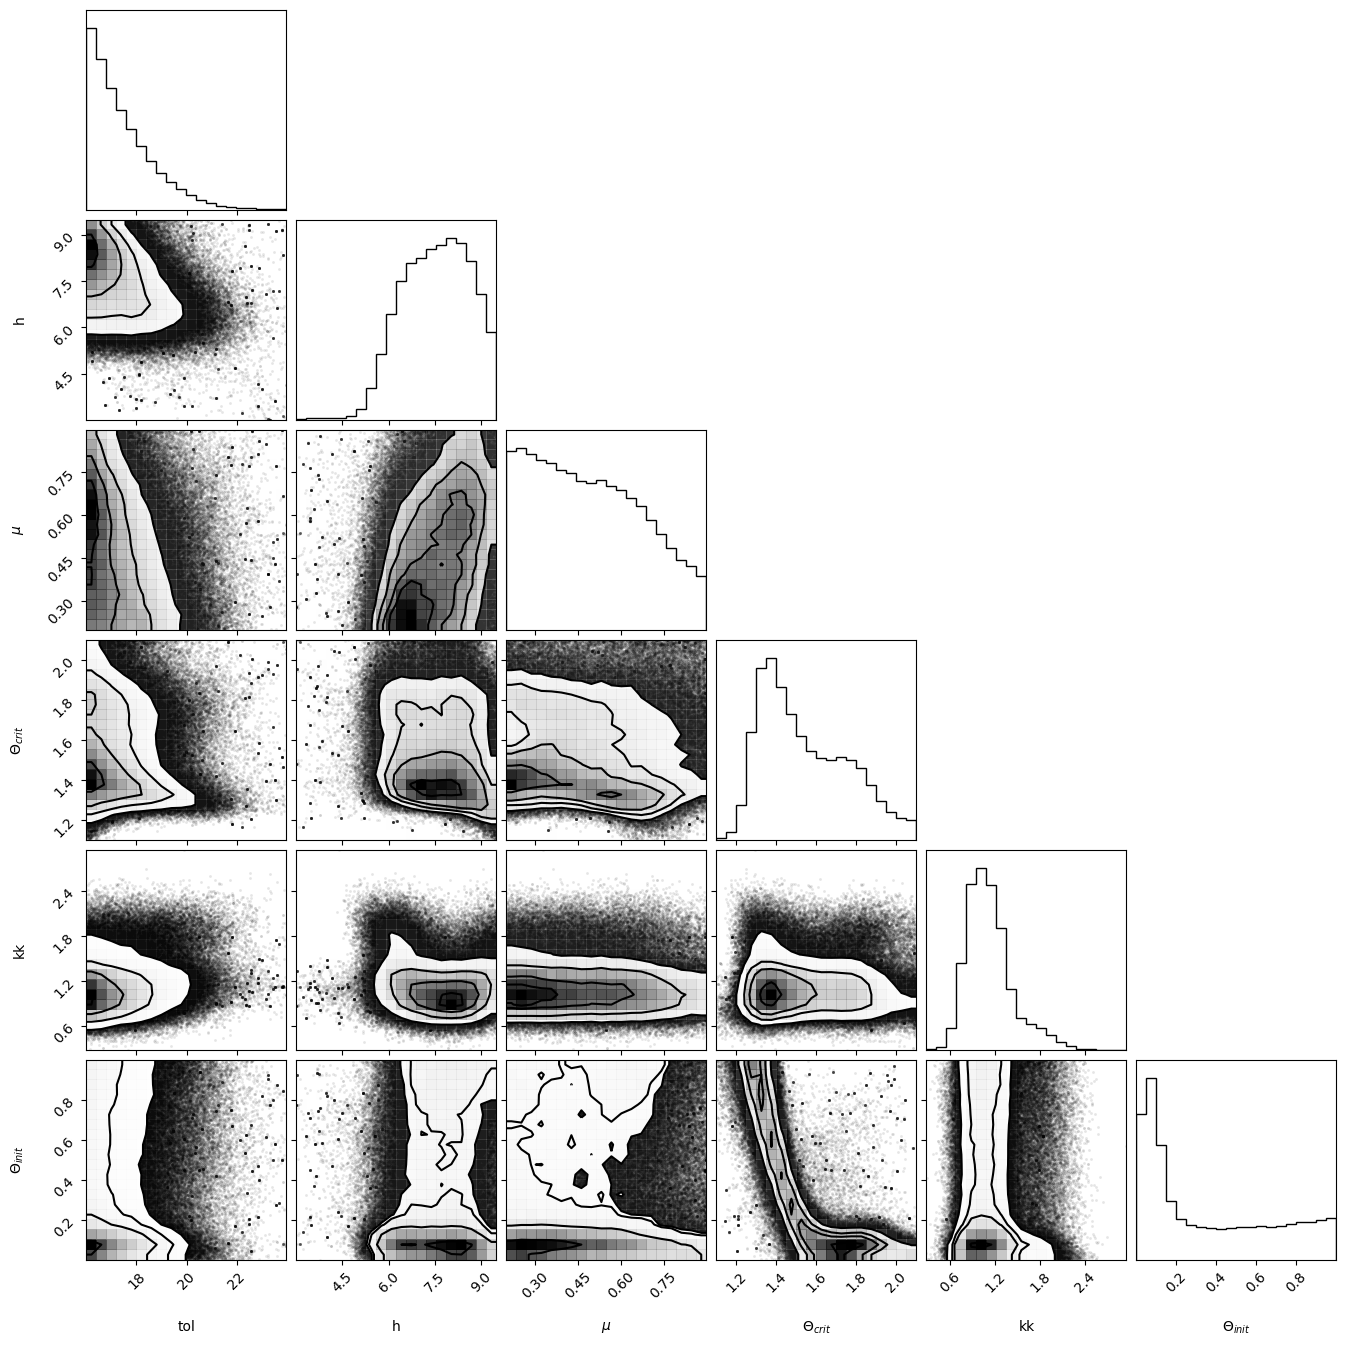

In [27]:
#Create a corner plot of the MCMC results
fig = corner.corner(samples, labels=["tol", "h", "$\mu$", "$\Theta_{{crit}}$", "kk", "$\Theta_{{init}}$"],
                    truths=[None, None, None, None, None, None])

plt.show()

In [29]:
tcrit_converge_samples = np.empty((1,6))
n_samples = samples[:, 0:3].shape[0]
for i in range(n_samples):
    if samples[i,5]>0.80:
        tcrit_converge_samples = np.append(tcrit_converge_samples, [samples[i,:]], axis=0)
print(len(tcrit_converge_samples))

45226


In [30]:
tcrit_value_samples = []
for i in range(n_samples):
    if samples[i,5]>0.80:
        tcrit_value_samples.append(samples[i,3])
print(len(tcrit_value_samples))

45225


In [55]:
import math
nan_in_list = any(math.isnan(x) for x in tcrit_converge_samples.flatten().tolist())

print(nan_in_list)  # True if NaN is in the list, False otherwise

False


In [56]:
print(tcrit_converge_samples)

[[ 0.67142282  0.36941534  0.67142282  4.06541534  5.63142282  0.36941534]
 [18.36157063  6.10593193  0.01873856  1.28281124  1.04645023  0.80957893]
 [16.5861449   7.97895259  0.06195147  1.2720093   0.88923016  0.86459009]
 ...
 [16.0704171   9.16868244  0.20889278  1.29509808  1.34132925  0.99427158]
 [16.00389286  8.99901175  0.256811    1.29896417  1.28690437  0.96571551]
 [16.03477161  8.9318691   0.2671214   1.29691953  1.29127324  0.97595628]]


In [114]:
##########Compute the MAP estimate for samples with high theta_init
log_posterior_values = []
# Calculate the log-posterior for each multivariate sample
for i in range(len(tcrit_converge_samples)):
    log_posterior_value = log_posterior(tcrit_converge_samples[i, :], y_observed, f, tcrit_converge_samples[i, 5])
    log_posterior_values.append(log_posterior_value)
    
# Find the index of the sample with the maximum log-posterior va
map_index = np.argmax(log_posterior_values)

# The MAP estimate is the sample with the highest log-posterior
map_estimate = tcrit_converge_samples[map_index]

print("MAP estimate:", map_estimate)

NameError: name 'tcrit_converge_samples' is not defined

In [ ]:
gp_1.predict(np.array([13.0665, 10.2571, 0.8972, 1.32656, 1.01364]).reshape(1,-1))

In [31]:
#plt.hist(tcrit_value_samples)
print(np.mean(tcrit_value_samples))
print(np.median(tcrit_value_samples))

1.3042302717602223
1.3033679843350983


In [1]:
fig = corner.corner(pair_plot_samples, labels=["tol", "h", "$\mu$", "$\Theta_{{crit}}$", "kk", "$\Theta_{{init}}$"],
                    truths=[None, None, None, None, None, None])

NameError: name 'corner' is not defined

In [ ]:
theta_crit_samples = []
for i in range()

In [38]:
fig = corner.corner(pair_plot_samples, labels=["tol", "h", "$\mu$", "$\Theta_{{crit}}$", "kk", "$\Theta_{{init}}$"],
                    truths=[None, None, None, None, None, None])

NameError: name 'pair_plot_samples' is not defined

In [ ]:
fig = plt.figure(figsize=(2,2))
corner.corner(pair_plot_samples[:,0], plot_contours=False, labels=["tol"], truths=[None])
plt.tight_layout()
plt.savefig("Tol_corner_marginal.png", dpi=200)

In [ ]:
import matplotlib.pyplot as plt

# Extract samples for each input variable
posterior_tol = samples[:, 0]  # Samples for the first input variable
posterior_h = samples[:, 1]  # Samples for the second input variable
posterior_mu = samples[:, 2]  # Samples for the third input variable
posterior_theta_crit = samples[:, 3]  # Samples for the fourth input variable
posterior_kk = samples[:, 4]  # Samples for the fifth input variable
# Plot histograms of the samples

tol_uniform_samples = np.random.uniform(low=12, high=25, size=100000)
h_uniform_samples = np.random.uniform(low=2, high=10.5, size=100000)
mu_uniform_samples = np.random.uniform(low=0.0, high=1.0, size=100000)
#Theta_Crit_lognormal_samples = np.log(np.random.lognormal(mean=mean, sigma=sigma, size=100000))
Theta_Crit_lognormal_samples = np.random.uniform(low=0.9, high=2.2, size=100000)
sigma_2_samples = np.random.uniform(low=0.05, high=2, size=100000)

#Plot Tol Prior and Posterior Distributions
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(tol_uniform_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs[0].set_xlabel('Prior Tol Distribution [mm]')
axs[0].set_ylabel('Probability Density')
axs[0].set_xlim([12, 25])
axs[0].set_ylim([0, 1.25])

axs[1].hist(posterior_tol, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
axs[1].set_xlabel('Posterior Tol Distribution after MCMC [mm]')
axs[1].set_ylabel('Probability Density')
axs[1].set_xlim([12, 25])
axs[1].set_ylim([0, 1.25])
plt.show()

#Plot h Prior and Posterior Distributions
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))
axs2[0].hist(h_uniform_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs2[0].set_xlabel('Prior h Distribution [mm]')
axs2[0].set_ylabel('Probability Density')
axs2[0].set_xlim([2, 10.5])
axs2[0].set_ylim([0, 1])


axs2[1].hist(posterior_h, bins=30, density=True, alpha=0.6, color='r', edgecolor='black')
axs2[1].set_xlabel('Posterior h Distribution after MCMC [mm]')
axs2[1].set_ylabel('Probability Density')
axs2[1].set_xlim([2, 10.5])
axs2[1].set_ylim([0, 1])

#Plot mu Prior and Posterior Distributions
fig3, axs3 = plt.subplots(1, 2, figsize=(10, 5))
axs3[0].hist(mu_uniform_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs3[0].set_xlabel('Prior $mu$ Distribution [MPa]')
axs3[0].set_ylabel('Probability Density')
axs3[0].set_xlim([0, 1])
axs3[0].set_ylim([0, 8])

axs3[1].hist(posterior_mu, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
axs3[1].set_xlabel('Posterior $mu$ Distribution after MCMC [MPa]')
axs3[1].set_ylabel('Probability Density')
axs3[1].set_xlim([0, 1])
axs3[1].set_ylim([0, 8])

#Plot Theta Crit Prior and Posterior Distributions
fig4, axs4 = plt.subplots(1, 2, figsize=(10, 5))
axs4[0].hist(Theta_Crit_lognormal_samples, bins=30, density=True, color='blue', alpha=0.6, edgecolor='black')
axs4[0].set_xlabel('Prior $\Theta_{{crit}}$ Distribution')
axs4[0].set_ylabel('Probability Density')
axs4[0].set_xlim([0.9, 2.2])
axs4[0].set_ylim([0, 8])


axs4[1].hist(posterior_theta_crit, bins=30, density=True, alpha=0.6, color='y', edgecolor='black')
axs4[1].set_xlabel('Posterior $\Theta_{{crit}}$ Distribution after MCMC')
axs4[1].set_ylabel('Probability Density')
axs4[1].set_xlim([0.9, 2.2])
axs4[1].set_ylim([0, 8])
plt.show()


fig5, axs5 = plt.subplots(1, 2, figsize=(10, 5))
x = np.linspace(0, 3, 10000)
density = gmm.pdf(x)
axs5[0].hist(data, bins=30, density=True, alpha=0.5, color='blue')
axs5[0].plot(x, density, color='red', label='GMM')
axs5[0].set_xlim([0,3])
axs5[0].set_ylim([0, 2.25])
axs5[0].set_xlabel('Prior kk Distribution')
axs5[0].set_ylabel('Density')
axs5[0].legend()

axs5[1].hist(posterior_kk, bins=30, density=True, alpha=0.6, color='m', edgecolor='black')
axs5[1].set_xlim([0,3])
axs5[1].set_ylim([0, 2.25])
axs5[1].set_xlabel('Posterior kk Distribution after MCMC')
axs5[1].set_ylabel('Probability Density')

plt.show()



In [ ]:
import numpy as np
sigma_2 = 0.2

In [ ]:
(1/(sigma_2*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((1)**2)/(sigma_2**2)))*np.exp(sigma_2**2)

In [ ]:
print(np.shape(samples))

In [ ]:
print(np.mean(samples[:,3]))

In [ ]:
sigma_1 = 5000
sigma_2 = 2
y = 4018
y_pred = 3750
err_pred = 1.75
likelihood = (1/(sigma_1*np.sqrt(2*np.pi)))*np.exp(-0.5 * np.sum(((y - y_pred)**2)/(sigma_1**2)))
print(likelihood)

In [77]:
output_samples = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    theta_init = 1 + (samples[i,3] - 1) * samples[i, -1]
    output_samples.append(gp_1.predict(samples[i, :-1].reshape(1, -1))/theta_init)

230000


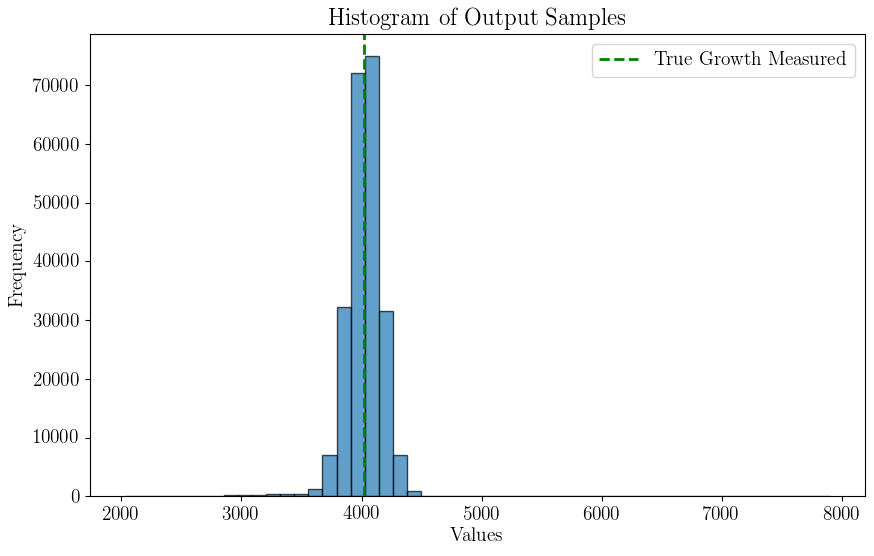

In [78]:
# Plot histogram
flat_samples = np.concatenate(output_samples)
plt.figure(figsize=(10, 6))
plt.hist(flat_samples, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(x=4018.853198, color='green', linestyle='--', linewidth=2, label="True Growth Measured")
# Add labels and title
plt.title('Histogram of Output Samples')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [ ]:
print(np.mean(output_samples))
print(np.median(output_samples))
print(np.std(output_samples))

In [79]:
output_samples_error = []
n_samples = samples[:, 0:3].shape[0]
print(n_samples)
for i in range(n_samples):
    output_samples_error.append(gp_2.predict(samples[i, :-1].reshape(1, -1)))

230000


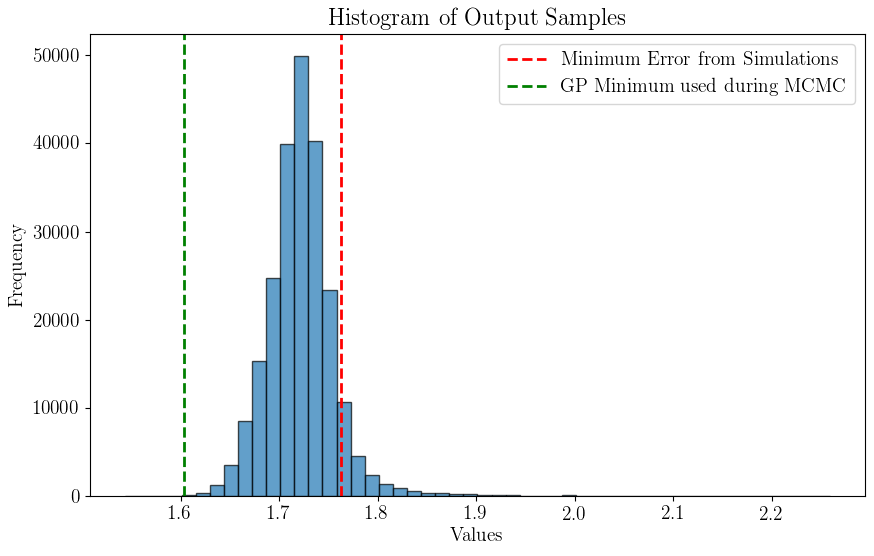

In [80]:
# Plot histogram
flat_samples_error = np.concatenate(output_samples_error)
plt.figure(figsize=(10, 6))
plt.hist(flat_samples_error, bins=50, edgecolor='black', alpha=0.7)
# Draw a dotted vertical line at x=2
plt.axvline(x=1.76319, color='red', linestyle='--', linewidth=2, label="Minimum Error from Simulations")
plt.axvline(x=1.6035263642685322, color='green', linestyle='--', linewidth=2, label="GP Minimum used during MCMC")
# Add labels and title
plt.title('Histogram of Output Samples')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show plot
plt.show()

16


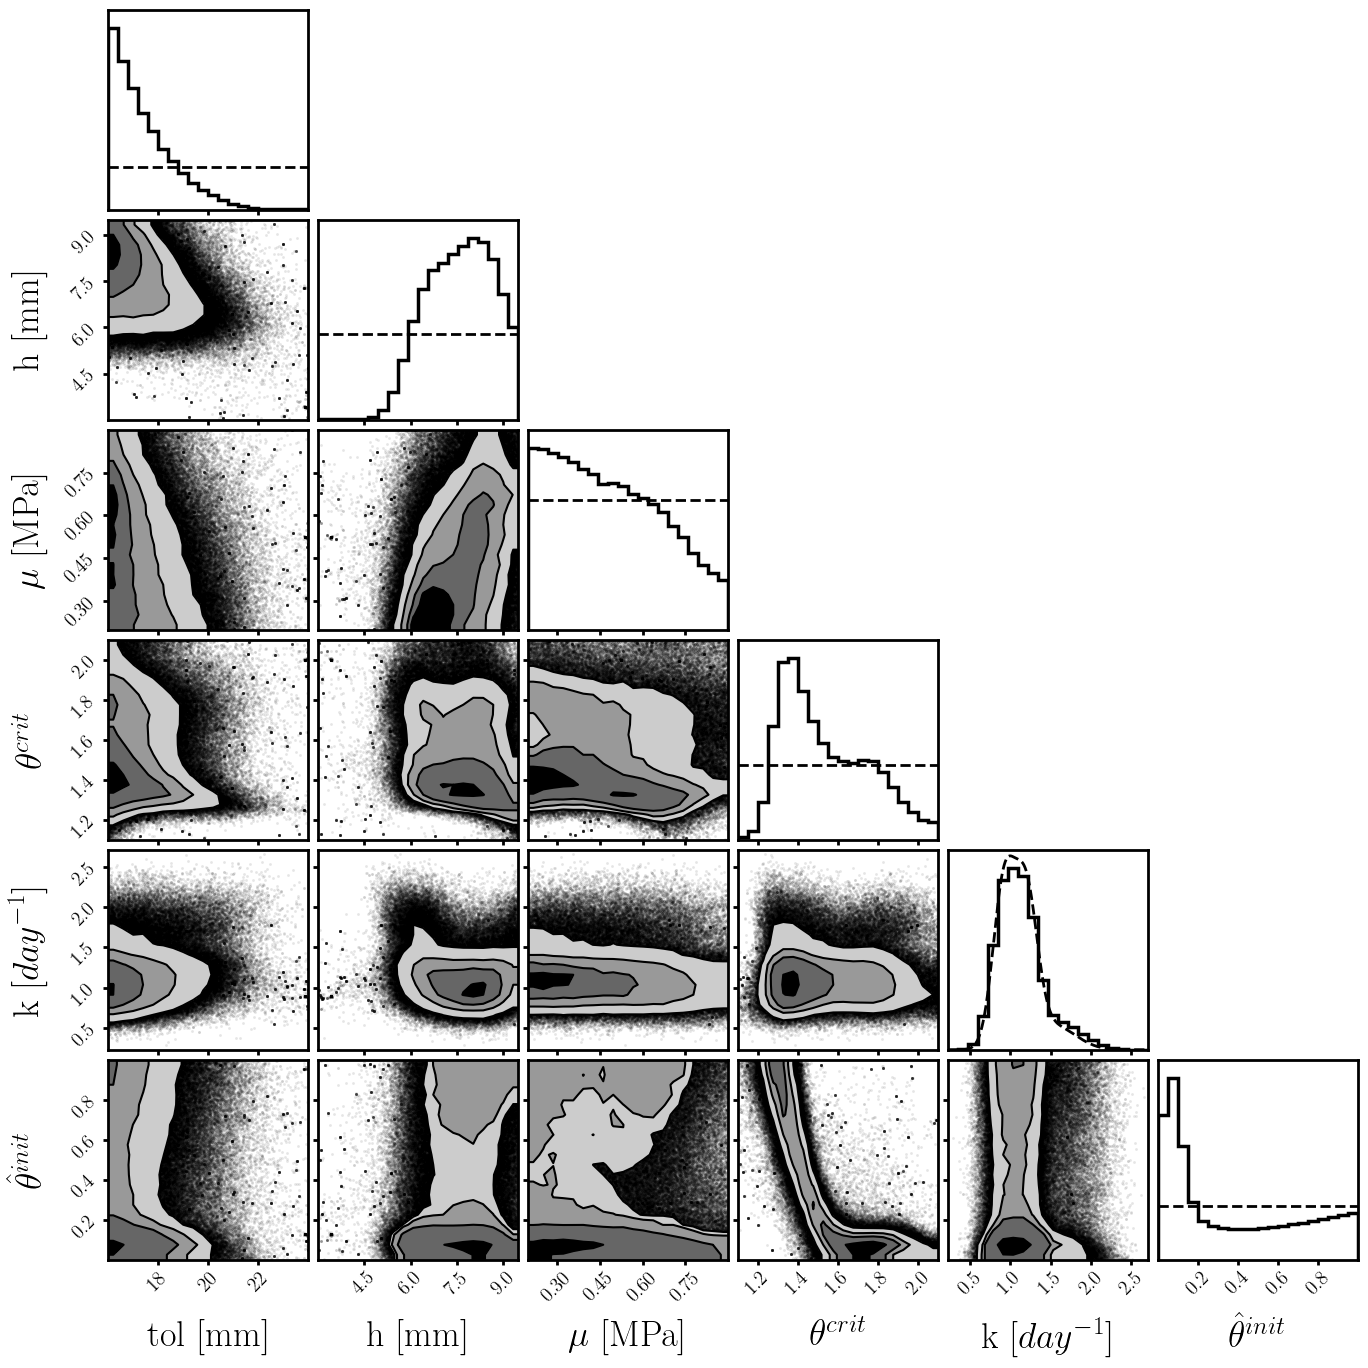

In [28]:
posterior_samples = samples

fig = corner.corner(posterior_samples, color= 'k', 
                    labels=["tol [mm]", "h [mm]", "$\mu$ [MPa]", "$\\theta^{{crit}}$", "k [$day^{-1}$]", "$\hat{\\theta}^{init}$"], 
                    title_kwargs={"fontsize": 12}, fill_contours=True, 
                    label_kwargs={"fontsize": 26, "fontweight": "bold"}, 
                    hist_kwargs={'density': True, 'linewidth': 2.5})


plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=14)  # Adjust the size as needed
font_properties = {'weight': 'bold', 'size': 26}  # Adjust the size as needed
# Define the prior distributions (this is just an example using normal distributions)
priors = [prior for prior in prior_distributions]

# Extract the axes from the corner plot
axes = np.array(fig.axes).reshape((6, 6))

print(priors[0].kwds['loc'])
# Overlay the priors on the diagonal subplots
for i in range(6):
    ax = axes[i, i]
    x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 1000)
    

    y = priors[i].pdf(x)

    # Plot the priors
    ax.plot(x, y, color='k', linestyle='--', linewidth=2.0)
    
axes = np.array(fig.axes).reshape((6, 6))  # Reshape axes into a 3x3 grid
for ax_row in axes:
    for ax in ax_row:
        for spine in ax.spines.values():
            spine.set_linewidth(2)  # Set the linewidth of each subplot's border
            # Set font properties for labels and ticks


# Apply the font properties to all text elements in the plot
for ax in fig.get_axes():
    ax.set_xlabel(ax.get_xlabel(), fontdict=font_properties)
    ax.set_ylabel(ax.get_ylabel(), fontdict=font_properties)
    ax.tick_params(axis='both', which='major', labelsize=28, width=2)  # Adjust the size as needed
    for tick in ax.get_xticklabels() + ax.get_yticklabels():
        tick.set_fontsize(14)  # Adjust the size as needed
        tick.set_fontweight('bold')

plt.savefig("Ped_1_Sim_Posteriors.png", dpi=200)
# Show the plot
plt.show()


In [67]:
print(np.median(samples[:,3]))
print(np.mean(samples[:,3]))

1.3908714917805356
1.4815285185565097


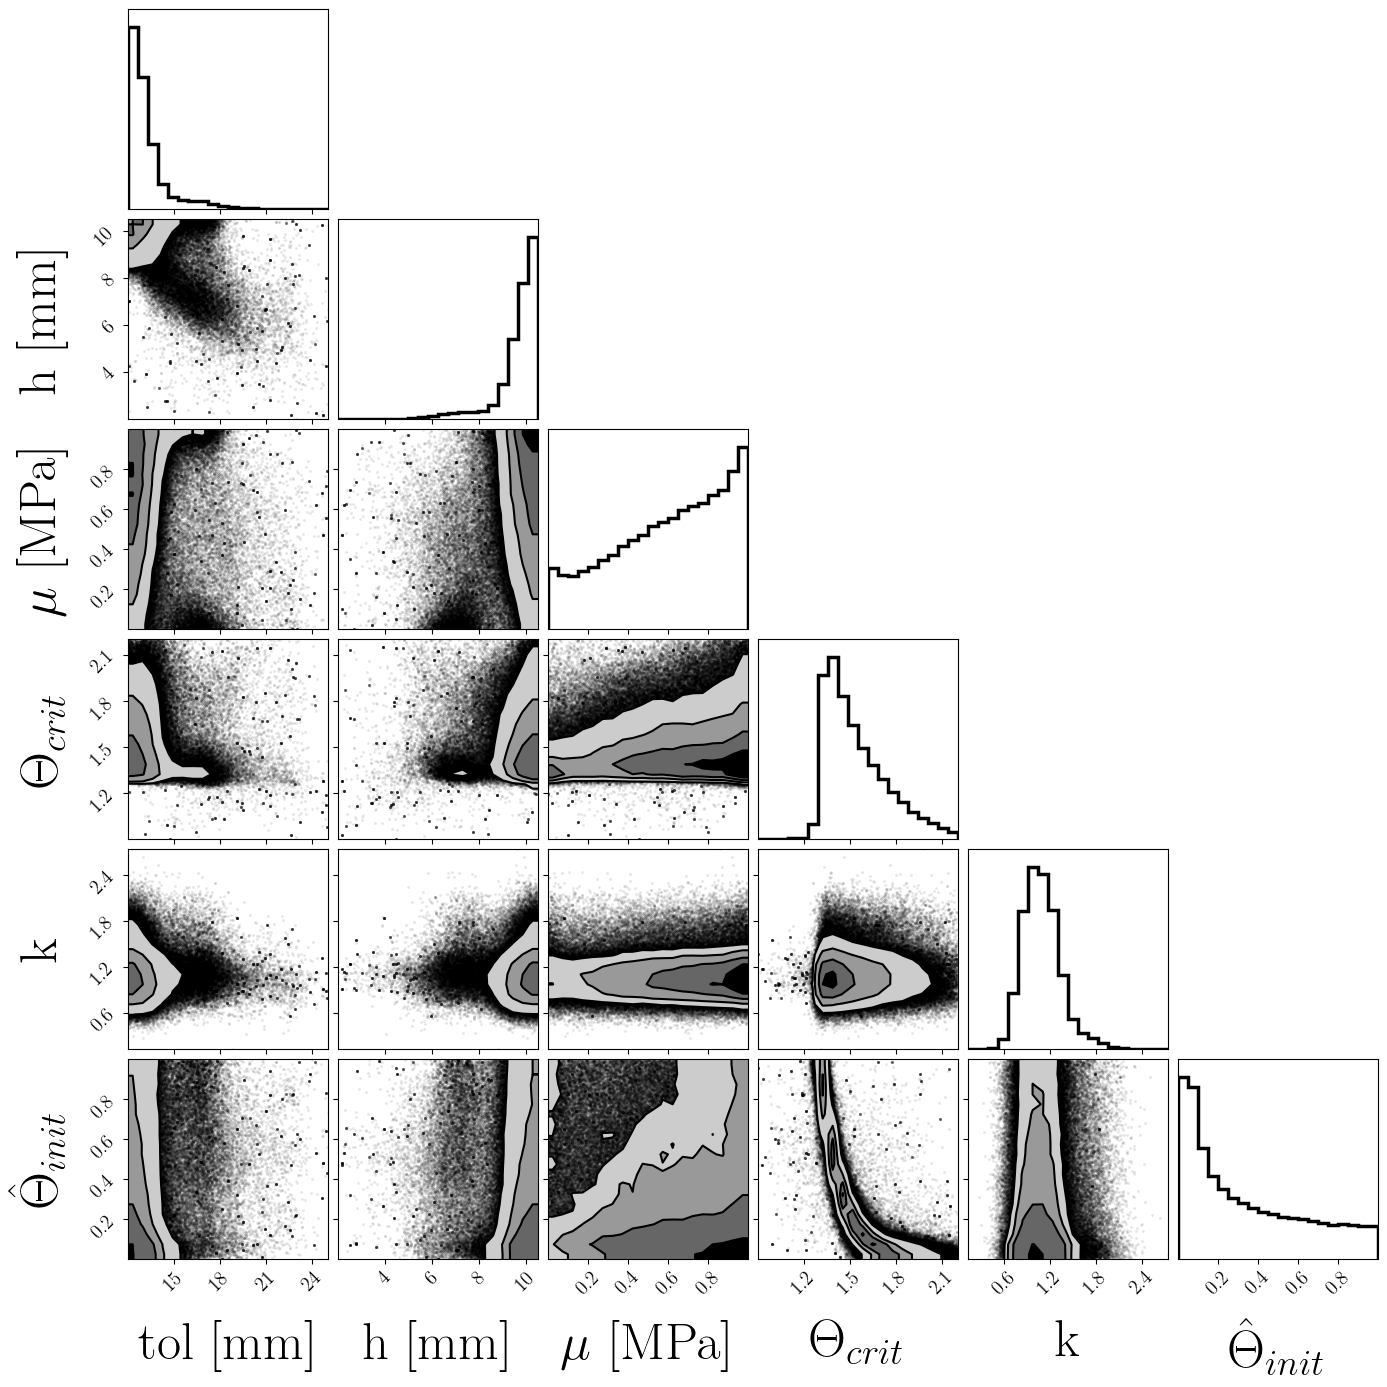

In [37]:
fig = corner.corner(posterior_samples, color= 'k', 
                    labels=["tol [mm]", "h [mm]", "$\mu$ [MPa]", "$\Theta_{{crit}}$", "k", "$\hat{\Theta}_{{init}}$"], 
                    title_kwargs={"fontsize": 12}, fill_contours=True, 
                    label_kwargs={"fontsize": 38, "fontweight": "bold"}, 
                    hist_kwargs={'density': True, 'linewidth': 2.5})